# Testing Linear Separability with UMAP

[UMAP](https://umap-learn.readthedocs.io/en/latest/#) is a great technique for embedding our data.

Embeddings are representation of the underlying dataset that capture some important information about it and represent it in lower dimensions. This can be useful for data exploration.

UMAP comes in two flavors, supervised and unsupervised. Through its interesting properties (preserving local neighborhood relations) analyzing the results can tell us quite a bit about the underlying data.

Let's start with reading in our data.

In [46]:
import pandas as pd
import umap
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import librosa

anno = pd.read_pickle('data/anno_with_audio.pkl')

We can now embed our examples in a 2-D space with just two lines of code!

In [15]:
reducer = umap.UMAP()
embeddings = reducer.fit_transform(np.stack(anno.audio.values))

Let us map each example to a different color.

In [ ]:
label_dict = {codename: i for i, codename in enumerate(anno['class'].unique())}

And now time to visualize the embeddings.

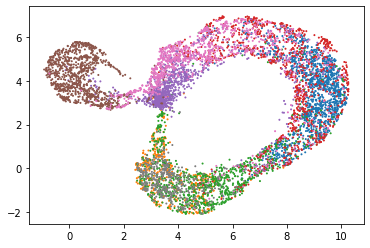

In [45]:
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    c=[sns.color_palette()[x] for x in anno['class'].map(label_dict)],
    s=1
)

We see some clustering but let's see if we can do better.

Now, bare in mind, that this is a representation created from raw audio!

Let us now attempt the same but on spectrograms.

In [49]:
specs = [librosa.feature.melspectrogram(audio, fmin=200, fmax=800, n_mels=64) for audio in anno.audio]

And we now redo the procedure feeding in the spectrograms to the reducer.

In [57]:
reducer = umap.UMAP()
embeddings = reducer.fit_transform(np.stack(specs).reshape(7285, -1))

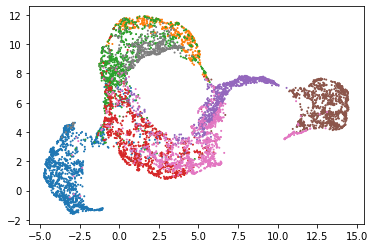

In [58]:
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    c=[sns.color_palette()[x] for x in anno['class'].map(label_dict)],
    s=1
)

Visually, this looks better, but is still not a great result. Let's see how much better we will fare with a supervised version of UMAP.

In [62]:
np.stack(specs)[np.where(anno.split == 'train')]

(5828, 64, 73)

In [72]:
reducer = umap.UMAP()
embeddings = reducer.fit_transform(
    np.stack(specs)[np.where(anno.split == 'train')].reshape(5828, -1),
    anno.loc[anno.split=='train', 'class'].map(label_dict)
)

This is how UMAP performs on the train set.

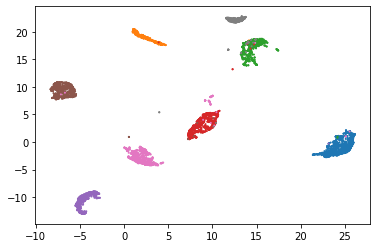

In [73]:
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    c=[sns.color_palette()[x] for x in anno.loc[anno.split=='train', 'class'].map(label_dict)],
    s=1
)

It seems to be doing very well, but has it learned something useful or is it just memorizing the train set?

Let's run it on our validation dataset.

In [74]:
embeddings = reducer.transform(np.stack(specs)[np.where(anno.split == 'valid')].reshape(1457, -1))

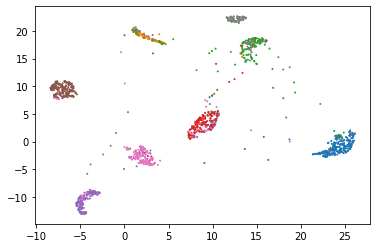

In [76]:
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    c=[sns.color_palette()[x] for x in anno.loc[anno.split=='valid', 'class'].map(label_dict)],
    s=1
)

The clusters are clearly delineated though there seem to be quite a few outliers.

It would be interesting to look at the data that appears outside of clusters and analyze what is throwing UMAP of. Maybe this could lead to and identification of subcalls within the 'coo' call category? That is a long shot, nonetheless looking at the individual examples could tell us something useful.

Additionally, we could look more closely at the cluster in the upper left hand portion of the graph, the one where green examples appear mixed with orange ones. We do not have this information included in our annotations, but maybe the monkeys are of the same gender and age, or similar in some other way? Following up on this could prove a valuable angle of inquiry.